In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
df.shape

(178, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

summary = {}

for col in num_cols:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

    summary [col] = {
        'Mean' : round(mean, 2),
        'Median' : round(median, 2),
        'std': round(std, 2),
        'lower': round(lower),
        'upper': round(upper),
    }
summary_df = pd.DataFrame(summary).T
print(summary_df)

                   Mean  Median     std  lower   upper
Type               1.94    2.00    0.78   -2.0     6.0
Alcohol           13.00   13.05    0.81   10.0    16.0
Malic              2.34    1.87    1.12   -1.0     5.0
Ash                2.37    2.36    0.27    2.0     3.0
Alcalinity        19.49   19.50    3.34   11.0    28.0
Magnesium         99.74   98.00   14.28   60.0   136.0
Phenols            2.30    2.35    0.63    0.0     4.0
Flavanoids         2.03    2.13    1.00   -1.0     5.0
Nonflavanoids      0.36    0.34    0.12    0.0     1.0
Proanthocyanins    1.59    1.56    0.57    0.0     3.0
Color              5.06    4.69    2.32   -1.0    11.0
Hue                0.96    0.96    0.23    0.0     2.0
Dilution           2.61    2.78    0.71    0.0     5.0
Proline          746.89  673.50  314.91 -226.0  1712.0


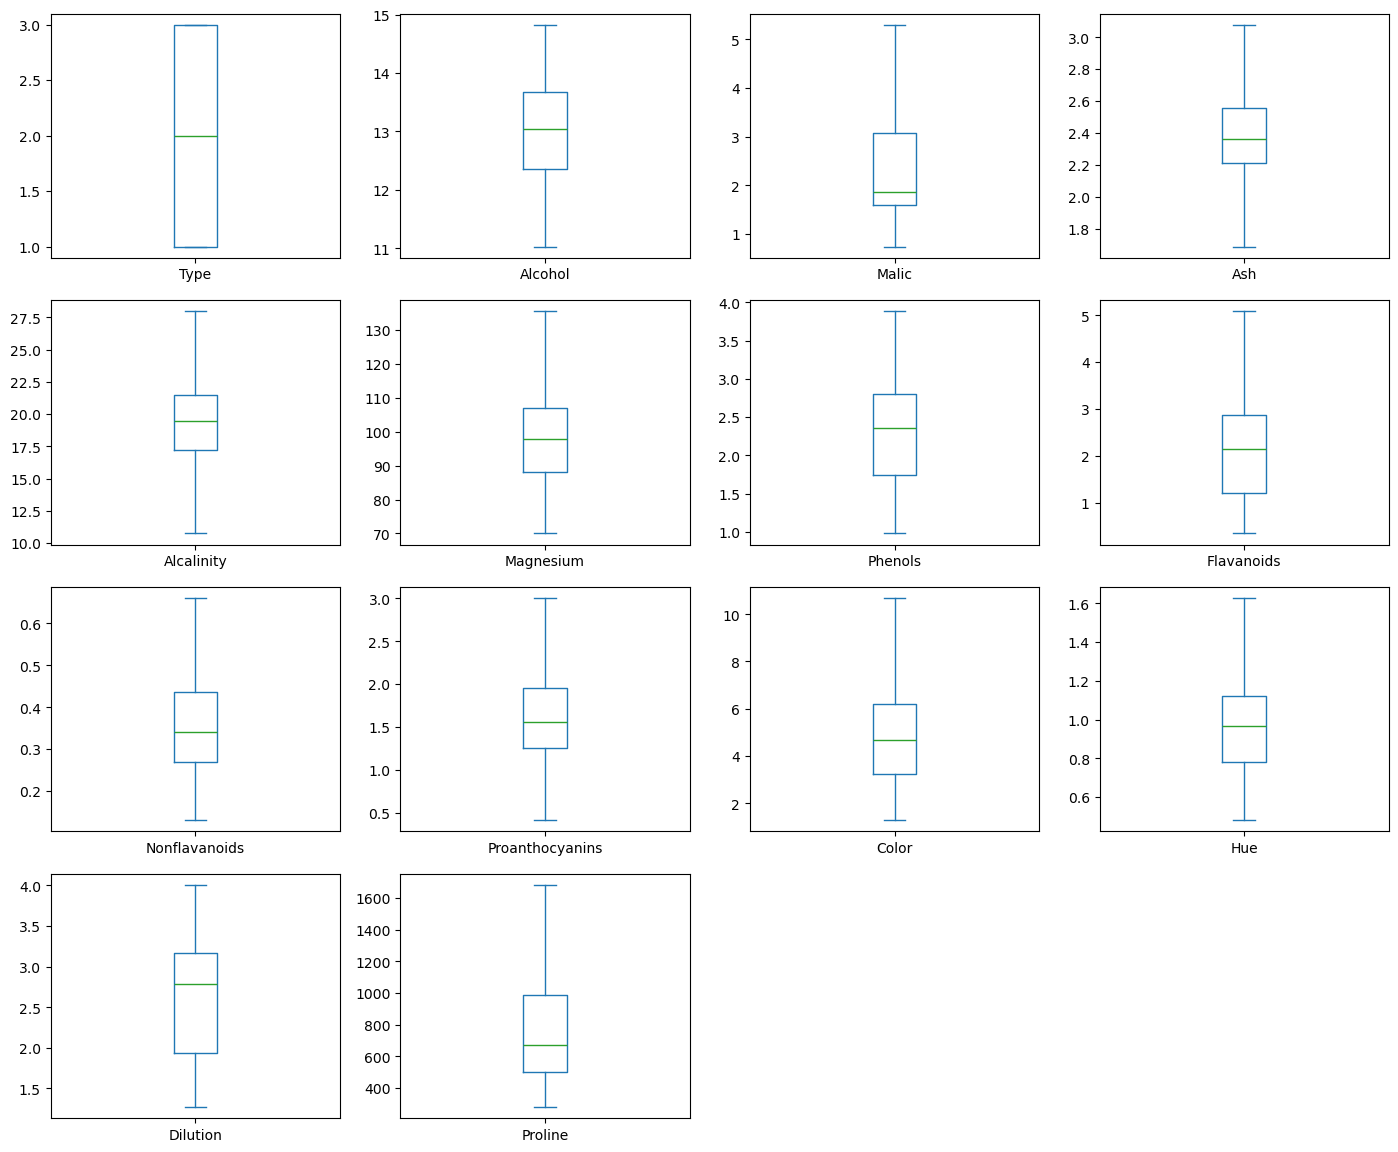

In [10]:
import math
num_cols = len(df.select_dtypes(include = 'int').columns)
rows = math.ceil(num_cols/4)
df.plot(kind = 'box', 
        subplots = True, 
        layout=(7, 4),
        
        figsize =(14, 20), 
        sharex = False, 
        sharey = False)

plt.title('BarPlot')
plt.tight_layout()
plt.show()

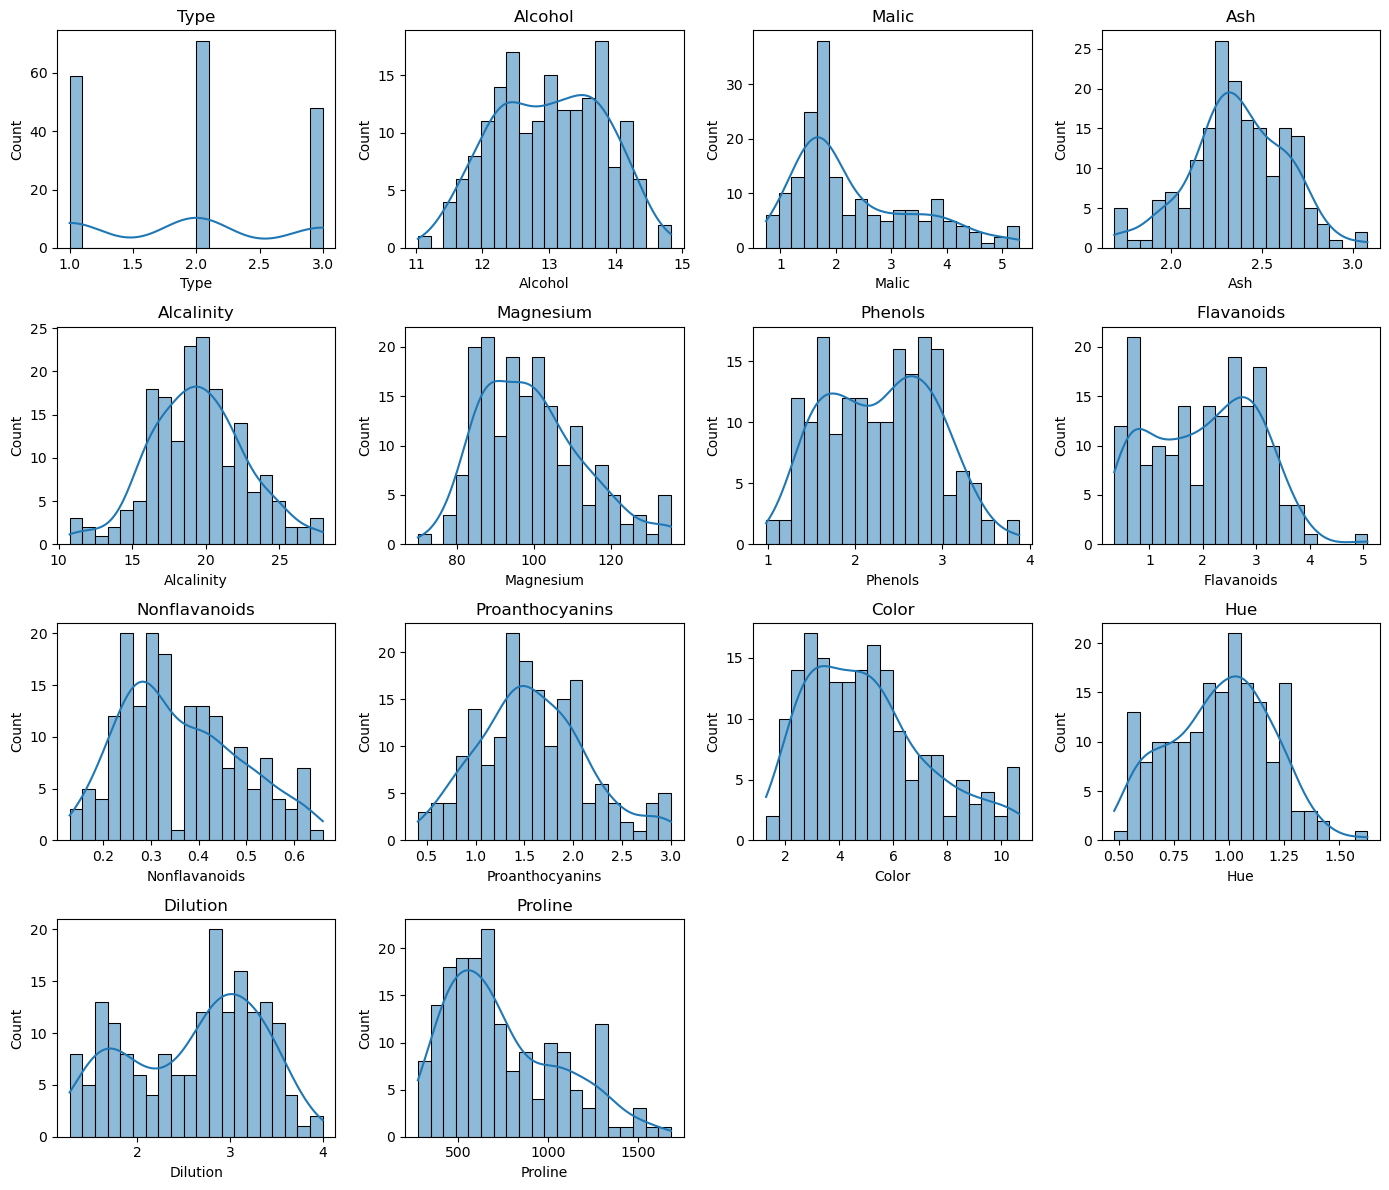

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(14, 12))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//4 + 1, 4, i)  
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

Correlation matrix (partial view):


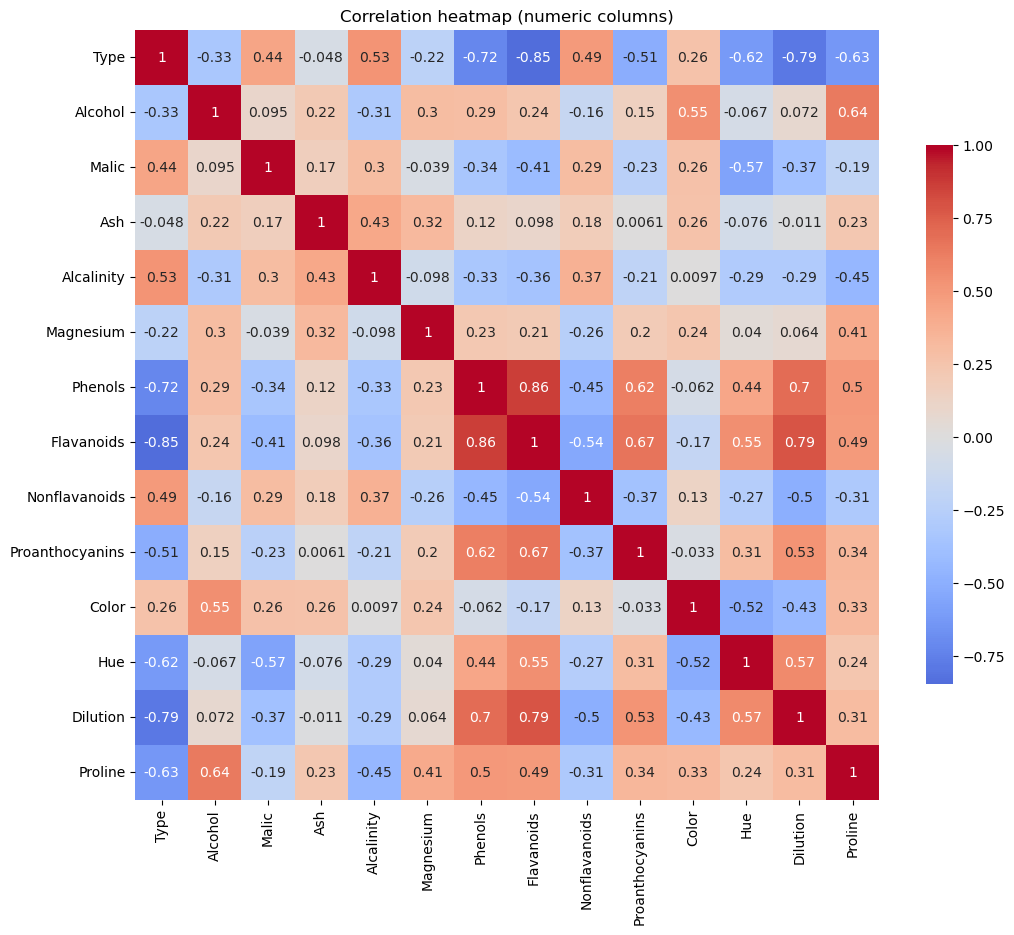

In [15]:
corr = df.corr()
print("Correlation matrix (partial view):")

plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=True, cbar_kws={"shrink": .7})
plt.title("Correlation heatmap (numeric columns)")
plt.show()

In [16]:
X = df.select_dtypes(include=['int64','float64'])

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("means (first 5):", np.round(X_scaled.mean(axis=0)[:5], 6))
print("stds  (first 5):", np.round(X_scaled.std(axis=0)[:5], 6))

means (first 5): [ 0. -0.  0. -0. -0.]
stds  (first 5): [1. 1. 1. 1. 1.]


In [18]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

for k in range(2, 7):
    kmeans = KMeans(n_clusters = k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)

    sil_score = silhouette_score(X_scaled, clusters)
    #dbi_score = davies_bouldin_score(X_scaled, clusters)

    print(f'k= {k}, silhouette = {sil_score: 3f}')

k= 2, silhouette =  0.286040
k= 3, silhouette =  0.306977
k= 4, silhouette =  0.257714
k= 5, silhouette =  0.187268
k= 6, silhouette =  0.179391


In [19]:
best_k = 3
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [20]:
# PCA: fit and show explained variance
pca_full = PCA()
pca_full.fit(X_scaled)
explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

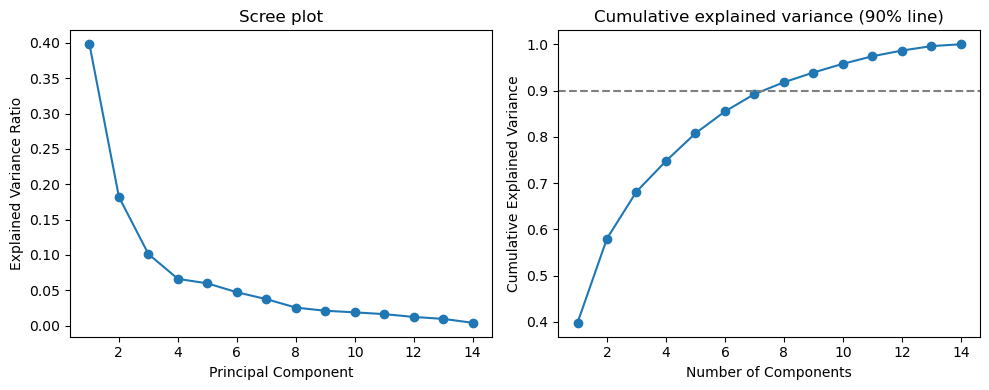

In [21]:
# Scree and cumulative plots
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(np.arange(1, len(explained)+1), explained, marker='o')
plt.xlabel('Principal Component'); plt.ylabel('Explained Variance Ratio'); plt.title('Scree plot')
plt.subplot(1,2,2)
plt.plot(np.arange(1, len(cum_explained)+1), cum_explained, marker='o')
plt.axhline(0.90, color='gray', linestyle='--')
plt.xlabel('Number of Components'); plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative explained variance (90% line)')
plt.tight_layout()
plt.show()

In [22]:
# After fitting KMeans with k=3
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=X.columns)

centroid_df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.000000,12.264478,1.904813,2.229235,19.947761,92.417910,2.235075,2.028507,0.361343,1.588657,3.020896,1.054810,2.775075,507.208955
1,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
2,1.048387,13.676774,1.997903,2.461573,17.420968,107.483871,2.847581,3.003226,0.292097,1.917581,5.453548,1.065484,3.163387,1100.225806


In [23]:
pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X_scaled)

In [24]:
X_pca.shape # 178 wine samples, 2 PCA components

(178, 3)

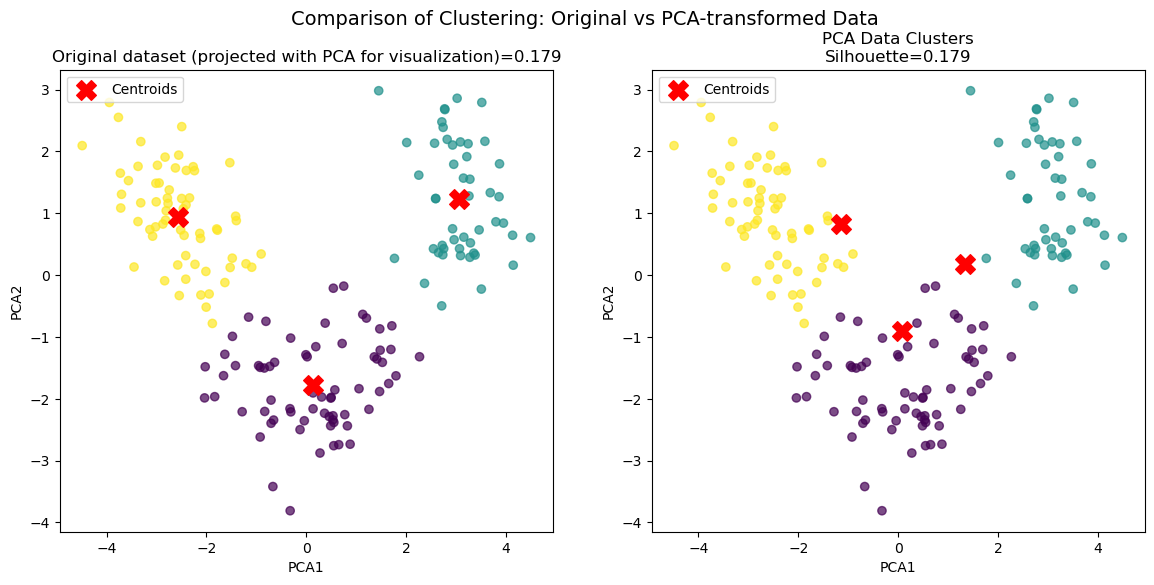

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

# Original dataset (projected with PCA for visualization)
axes[0].scatter(X_pca[:,0],X_pca[:,1],c=clusters, cmap='viridis', alpha=0.7)
axes[0].scatter(pca.transform(kmeans.cluster_centers_)[:,0],
            pca.transform(kmeans.cluster_centers_)[:,1],
            c='red', marker = 'X', s=200, label = 'Centroids')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')
axes[0].set_title(f"Original dataset (projected with PCA for visualization)={sil_score:.3f}")
axes[0].legend()

# PCA dataset clustering

axes[1].scatter(X_pca[:,0], X_pca[:,1], c=clusters, cmap='viridis', alpha=0.7)
axes[1].scatter(kmeans.cluster_centers_[:,0],
                kmeans.cluster_centers_[:,1],
                c='red', marker='X', s=200, label='Centroids')
axes[1].set_title(f"PCA Data Clusters\nSilhouette={sil_score:.3f}")
axes[1].set_xlabel("PCA1")
axes[1].set_ylabel("PCA2")
axes[1].legend()


plt.suptitle("Comparison of Clustering: Original vs PCA-transformed Data", fontsize=14)
plt.show()

In [26]:
print("Result of 2 components:", pca.explained_variance_ratio_.sum())

Result of 2 components: 0.6814965477698067


In [27]:
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.000000,12.264478,1.904813,2.229235,19.947761,92.417910,2.235075,2.028507,0.361343,1.588657,3.020896,1.054810,2.775075,507.208955
1,2.979592,13.151633,3.333163,2.434694,21.438776,99.020408,1.678163,0.797959,0.450816,1.163061,7.270816,0.685918,1.690204,627.551020
2,1.048387,13.676774,1.997903,2.461573,17.420968,107.483871,2.847581,3.003226,0.292097,1.917581,5.453548,1.065484,3.163387,1100.225806


## conclusion 

- Best clustering result at k=3
- Original dataset gave slightly better clustering than PCA-transformed data.
- PCA helped visualize clusters clearly in 2D.
- Clustering on original data → more accurate, preserves all feature info.
- PCA + clustering → faster, easier to visualize, reduces noise but may lose detail.
- Use original dataset for performance and accuracy.
- Use PCA-transformed dataset for visualization and exploratory analysis.
- Combine both: evaluate on original, visualize with PCA.
